# Árboles de decisión

## Procesado de los datos

El conjunto de datos sobre cáncer de mama está incluido en *Scikit-learn*, se obtiene usando la función `load_breast_cancer` incluida en la librería `sklearn.datasets`. Este conjunto de datos contiene 569 ejemplos con 30 características sobre clasificaciones de cáncer de mama, con dos clasificaciones posibles.

In [48]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

Este conjunto de datos es un diccionario con varios campos:
* `data`: Es el conjunto de datos, se trata de un array en el que cada componente es un array con las características de cada instancia.
* `target`: Es el conjunto de valores de clasificación para cada instancia. Es un array del mismo tamaño que `data`, en el que se indica el valor de clasificación de cada instancia, en el mismo orden en que éstas se encuentran en el array `data`.
* `DESCR`: Es una descripción del conjunto de datos.
* `target_names`: Es un array con los nombres de cada valor de clasificación.
* `feature_names`: Es un array con los nombres de cada característica.

Almacenamos los datos en las variables `X_data`, `y_data`, `X_names` e `y_names`.

In [49]:
X_data, y_data, X_names, y_names = \
    cancer.data, cancer.target, cancer.feature_names, cancer.target_names

## Contenido del ejercicio

El ejercicio consiste en
* Realizar una separación del conjunto de instancias en conjunto de entrenamiento (70%) y conjunto de prueba (30%).
* Construir un árbol de decisión sin poda para el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de prueba.
* Definir la funcion `postPoda` que, dado un clasificador basado en árboles de decisión, `treeClf`, un conjunto de ejemplos, `Xdata`, y sus valores de clasificación, `ydata`; evalúe todas las posibles podas del árbol del clasificador `treeClf` en todos los nodos internos (una única poda cada vez) y devuelva el clasificador con el árbol podado que suponga una mayor mejora en el rendimiento (con respecto al clasificador original) en el conjunto de ejemplos proporcionado. En caso de que ninguna poda mejore el rendimiento del clasificador original, devuelve dicho clasificador.
* Utilizar la función del apartado anterior para podar a posteriori el clasificador basado en árboles de decisión obtenido en el segundo apartado, con respecto al conjunto de datos de entrenamiento (no debe haber mejora), con respecto al conjunto de datos de prueba y con respecto al conjunto total de datos.
* Comparar el rendimiento de los clasificadores obtenidos en el apartado anterior con los que se podrían obtener a partir del conjunto de datos de entrenamiento usando distintos tipos de podas a priori (*max_depth*, *min_samples_split*, *min_impurity_split*, ...) y *ensemble learning* (*random fores*, *gradient boosting*)

El **desarrollo tiene que estar razonado**, indicando en cada apartado qué se está haciendo, **demostrando así el conocimiento adquirido en este módulo**. ¿Qué conclusiones puedes sacar de lo aprendido sobre árboles de decisión?

### Ejercicio

In [50]:
# Realizar una separación del conjunto de instancias en conjunto de entrenamiento (70%) y conjunto de prueba (30%).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size = 0.3, random_state=462)

In [51]:
# Construir un árbol de decisión sin poda para el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de prueba.
from sklearn.tree import DecisionTreeClassifier

tree1_clf = DecisionTreeClassifier(random_state=10)
tree1_clf.fit(X_train,y_train)

print("Rendimiento en el conjunto de entrenamiento: ",tree1_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree1_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree1_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9298245614035088
Rendimiento en el conjunto total:  0.9789103690685413


<Figure size 432x288 with 0 Axes>

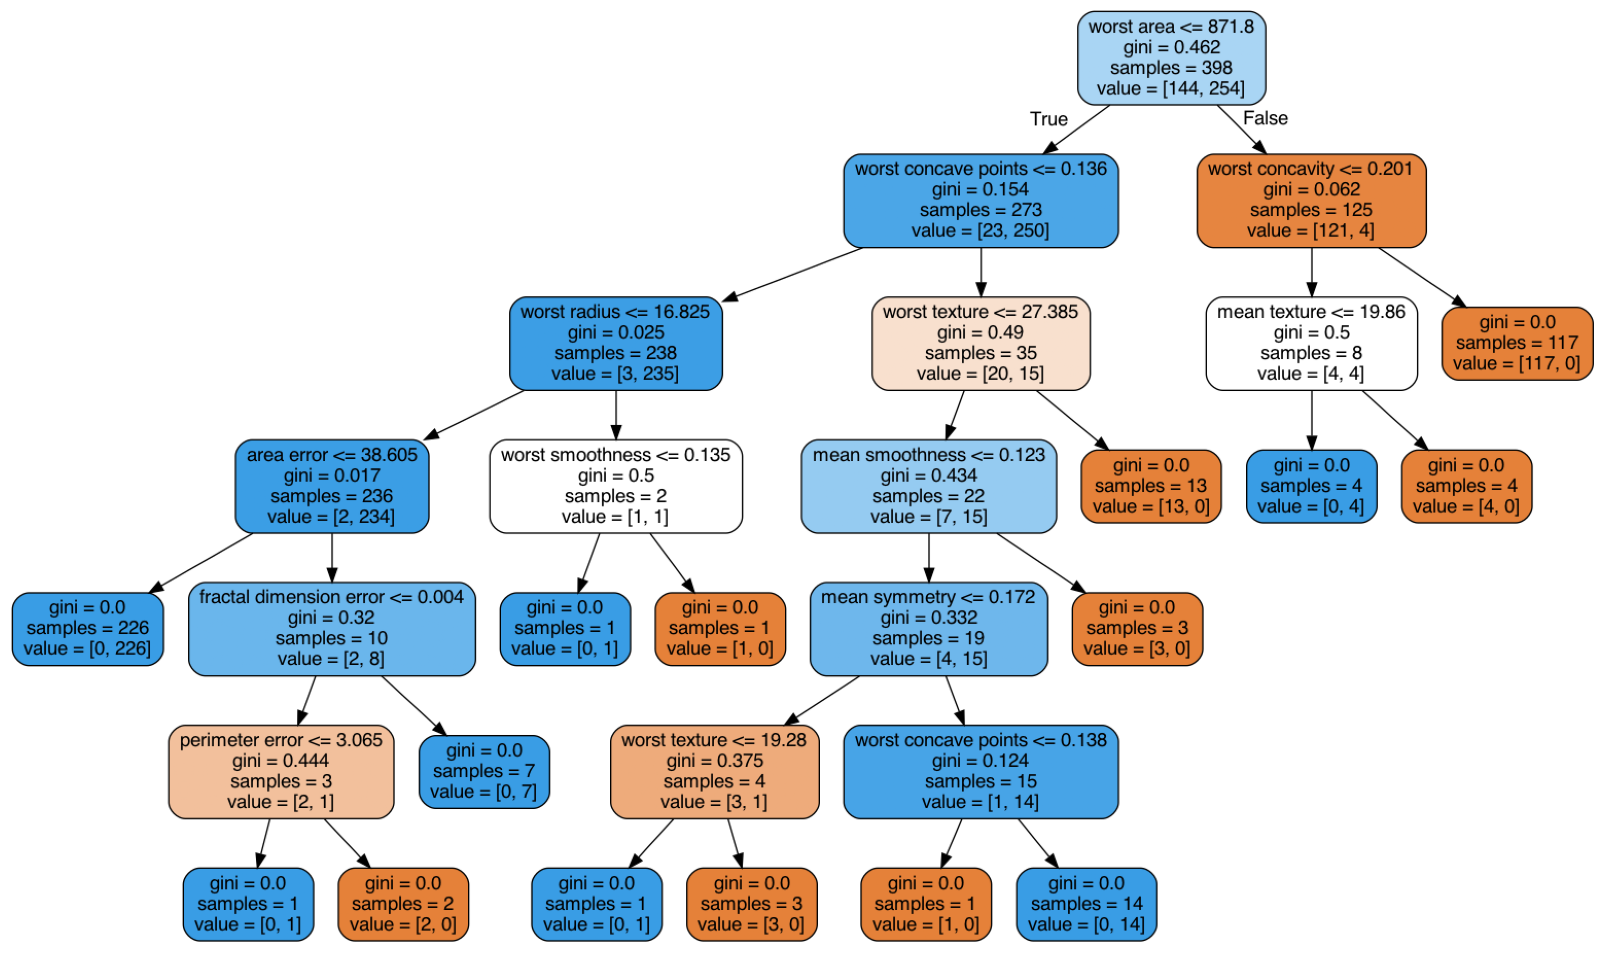

In [52]:
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt

def show_tree(tree_clf,features):
    export_graphviz(
        tree_clf,
        out_file="cancer_tree_clf.dot",
        feature_names=features,
        rounded=True,
        filled=True)
    !dot -Tpng cancer_tree_clf.dot -o cancer_tree_clf.png
    plt.clf()
    dpi = 70
    image = plt.imread("cancer_tree_clf.png")
    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(image)
    plt.show()

show_tree(tree1_clf,cancer.feature_names)

In [53]:
# Definir la funcion `postPoda` que, dado un clasificador basado en árboles de decisión, `treeClf`, un conjunto de ejemplos, `Xdata`, 
# y sus valores de clasificación, `ydata`; evalúe todas las posibles podas del árbol del clasificador `treeClf` en 
# todos los nodos internos (una única poda cada vez) y devuelva el clasificador con el árbol podado que suponga 
# una mayor mejora en el rendimiento (con respecto al clasificador original) en el conjunto de ejemplos proporcionado. 
# En caso de que ninguna poda mejore el rendimiento del clasificador original, devuelve dicho clasificador.

from copy import deepcopy
def postPoda(treeClf, Xdata, ydata):
    score = treeClf.score(Xdata, ydata)
    postPodaTree = treeClf
    for i in range(len(treeClf.tree_.feature)):
        tree_clf_copy = deepcopy(treeClf)
        if tree_clf_copy.tree_.feature[i] != -2:    
            tree_clf_copy.tree_.children_left[i] = -1
            tree_clf_copy.tree_.children_right[i] = -1
            tree_clf_copy.tree_.feature[i] = -2
            newScore =  tree_clf_copy.score(Xdata,ydata)
            if newScore > score:
                score = newScore
                postPodaTree = tree_clf_copy
    return postPodaTree

<Figure size 432x288 with 0 Axes>

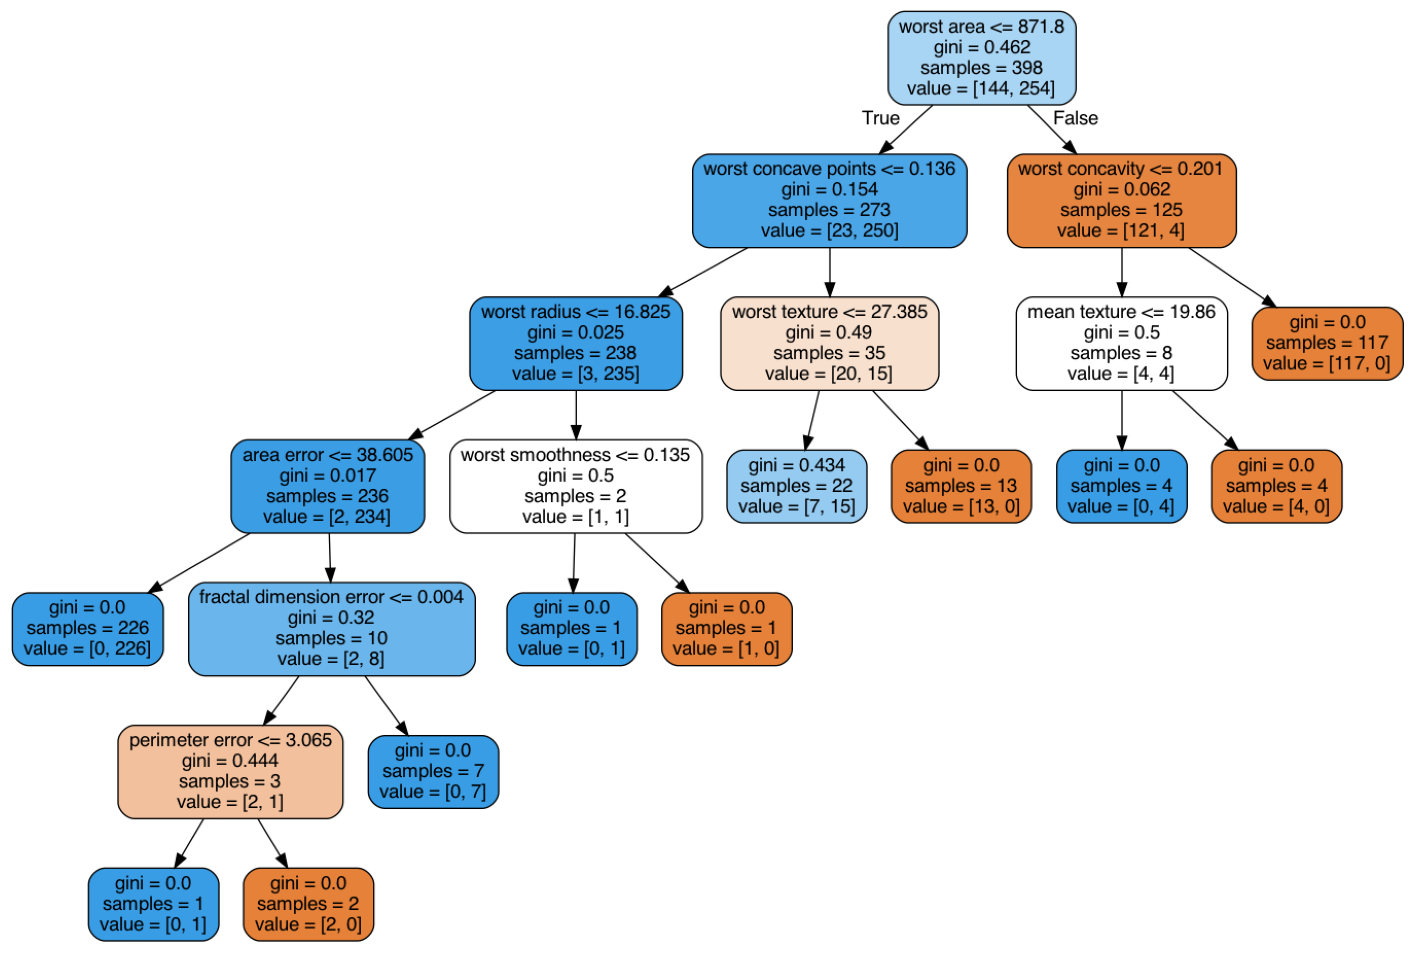

Rendimiento en el conjunto de entrenamiento:  0.9824120603015075
Rendimiento en el conjunto de prueba:  0.9473684210526315
Rendimiento en el conjunto total:  0.9718804920913884


In [54]:
postPodaTree_test = postPoda(tree1_clf, X_test, y_test)
show_tree(postPodaTree_test, cancer.feature_names)

print("Rendimiento en el conjunto de entrenamiento: ",postPodaTree_test.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",postPodaTree_test.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",postPodaTree_test.score(X_data,y_data))

In [55]:
# Comparar el rendimiento de los clasificadores obtenidos en el apartado anterior con los que se podrían obtener 
# a partir del conjunto de datos de entrenamiento usando distintos tipos de 
# podas a priori (*max_depth*, *min_samples_split*, *min_impurity_split*, ...) 
# y *ensemble learning* (*random fores*, *gradient boosting*)

In [56]:
tree_clf_mid_01 = DecisionTreeClassifier(random_state=10,min_impurity_decrease=0.1)
tree_clf_mid_01.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_mid_01.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_mid_01.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_mid_01.score(X_data,y_data))

tree_clf_mid_03 = DecisionTreeClassifier(random_state=10,min_impurity_decrease=0.3)
tree_clf_mid_03.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_mid_03.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_mid_03.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_mid_03.score(X_data,y_data))

tree_clf_msp_15 = DecisionTreeClassifier(random_state=10,min_samples_split=15)
tree_clf_msp_15.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_msp_15.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_msp_15.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_msp_15.score(X_data,y_data))

tree_clf_msp_25 = DecisionTreeClassifier(random_state=10,min_samples_split=25)
tree_clf_msp_25.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_msp_25.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_msp_25.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_msp_25.score(X_data,y_data))

tree_clf_md_10 = DecisionTreeClassifier(random_state=10,max_depth=10)
tree_clf_md_10.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_md_10.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_md_10.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_md_10.score(X_data,y_data))

tree_clf_md_4 = DecisionTreeClassifier(random_state=10,max_depth=4)
tree_clf_md_4.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",tree_clf_md_4.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree_clf_md_4.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree_clf_md_4.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9321608040201005
Rendimiento en el conjunto de prueba:  0.8888888888888888
Rendimiento en el conjunto total:  0.9191564147627417
Rendimiento en el conjunto de entrenamiento:  0.9321608040201005
Rendimiento en el conjunto de prueba:  0.8888888888888888
Rendimiento en el conjunto total:  0.9191564147627417
Rendimiento en el conjunto de entrenamiento:  0.9773869346733668
Rendimiento en el conjunto de prueba:  0.935672514619883
Rendimiento en el conjunto total:  0.9648506151142355
Rendimiento en el conjunto de entrenamiento:  0.964824120603015
Rendimiento en el conjunto de prueba:  0.9298245614035088
Rendimiento en el conjunto total:  0.9543057996485061
Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.9298245614035088
Rendimiento en el conjunto total:  0.9789103690685413
Rendimiento en el conjunto de entrenamiento:  0.9849246231155779
Rendimiento en el conjunto de prueba:  0.9473684210526315
Rendimien

In [57]:
# *ensemble learning* (*random fores*, *gradient boosting*)
# Randome Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=9)
forest.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",forest.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",forest.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",forest.score(X_data,y_data))

# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
ensemble = GradientBoostingClassifier(n_estimators=10)
ensemble.fit(X_train,y_train)
print("Rendimiento en el conjunto de entrenamiento: ",ensemble.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",ensemble.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",ensemble.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9974874371859297
Rendimiento en el conjunto de prueba:  0.935672514619883
Rendimiento en el conjunto total:  0.9789103690685413
Rendimiento en el conjunto de entrenamiento:  0.9899497487437185
Rendimiento en el conjunto de prueba:  0.935672514619883
Rendimiento en el conjunto total:  0.9736379613356766
